In [1]:
from path_cover import *

In [2]:
from pytket import Circuit
from pytket.circuit.display import get_circuit_renderer, render_circuit_jupyter, view_browser

circuit_renderer = get_circuit_renderer() # Instantiate a circuit renderer
circuit_renderer.config.render_options.condense_c_bits = True # You can also set the properties on the instance directlyprint("Render options:")
circuit_renderer.set_render_options(zx_style=True, min_height="500px") # Configure render options
print(circuit_renderer.get_render_options()) # View currently set render options

circuit_renderer.save_render_options()  # Export current render options to the pytket config

{'zx_style': True, 'condense_c_bits': True}


In [3]:
def demo(n_lines, n_more_edges):
    G = gen_graph(n_lines=n_lines, n_more_edges=n_more_edges)
    
    print(f"Generated graph with {len(G.nodes())} nodes and "
          f"{len(G.edges())} edges")
    print("Nodes:", list(G.nodes()))
    print("Edges:", list(G.edges()))

    path_cover = find_path_cover(G)
    
    if path_cover:
        for i, path_edges in enumerate(path_cover):
            print(f"  Path {i+1}: {path_edges}")
    
    visualize_graph(G, path_cover)
    return G, path_cover

Generated graph with 15 nodes and 14 edges
Nodes: [9, 3, 6, 13, 2, 4, 5, 1, 7, 12, 10, 0, 8, 14, 11]
Edges: [(9, 3), (3, 10), (3, 6), (13, 2), (2, 4), (2, 5), (4, 5), (5, 1), (1, 7), (1, 14), (12, 10), (10, 0), (8, 14), (14, 11)]
No path cover found with 1 paths
No path cover found with 2 paths
No path cover found with 3 paths
Path cover with 4 paths found (11 edges)
  Path 1: [(0, 10), (10, 12)]
  Path 2: [(1, 5), (1, 7), (2, 4), (2, 13), (4, 5)]
  Path 3: [(3, 9), (3, 6)]
  Path 4: [(8, 14), (11, 14)]


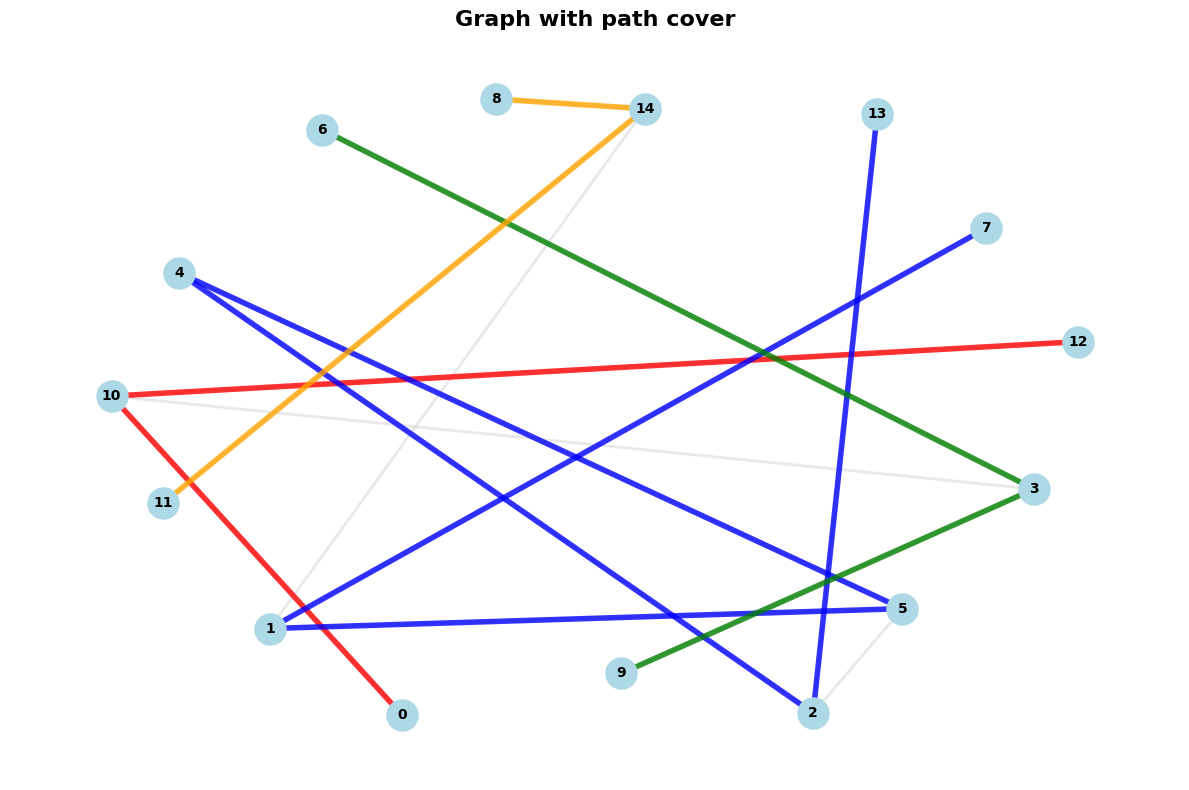

In [4]:
G, path_cover = demo(n_lines=4, n_more_edges=3)

In [5]:
circ = extract_circuit(G, path_cover)

In [6]:
circuit_renderer.set_render_options(min_height="300px")
render_circuit_jupyter(circ)

Generated graph with 37 nodes and 38 edges
Nodes: [24, 0, 27, 12, 4, 35, 8, 5, 17, 25, 15, 9, 22, 29, 13, 32, 3, 14, 26, 23, 30, 33, 31, 36, 21, 16, 20, 19, 10, 7, 2, 18, 1, 11, 34, 6, 28]
Edges: [(24, 0), (0, 27), (0, 6), (12, 4), (4, 9), (4, 35), (8, 5), (5, 31), (5, 17), (25, 15), (15, 9), (15, 14), (9, 22), (22, 29), (22, 2), (29, 13), (29, 19), (13, 32), (13, 34), (3, 14), (14, 26), (26, 23), (23, 30), (23, 21), (33, 31), (31, 36), (36, 21), (21, 16), (16, 20), (20, 19), (20, 11), (19, 10), (7, 2), (2, 18), (1, 11), (11, 34), (34, 6), (6, 28)]
No path cover found with 1 paths
No path cover found with 2 paths
No path cover found with 3 paths
No path cover found with 4 paths
No path cover found with 5 paths
No path cover found with 6 paths
No path cover found with 7 paths
Path cover with 8 paths found (29 edges)
  Path 1: [(0, 24), (0, 27)]
  Path 2: [(1, 11), (6, 34), (6, 28), (11, 34)]
  Path 3: [(2, 7), (2, 18)]
  Path 4: [(3, 14), (14, 26), (23, 26), (23, 30)]
  Path 5: [(4, 12)

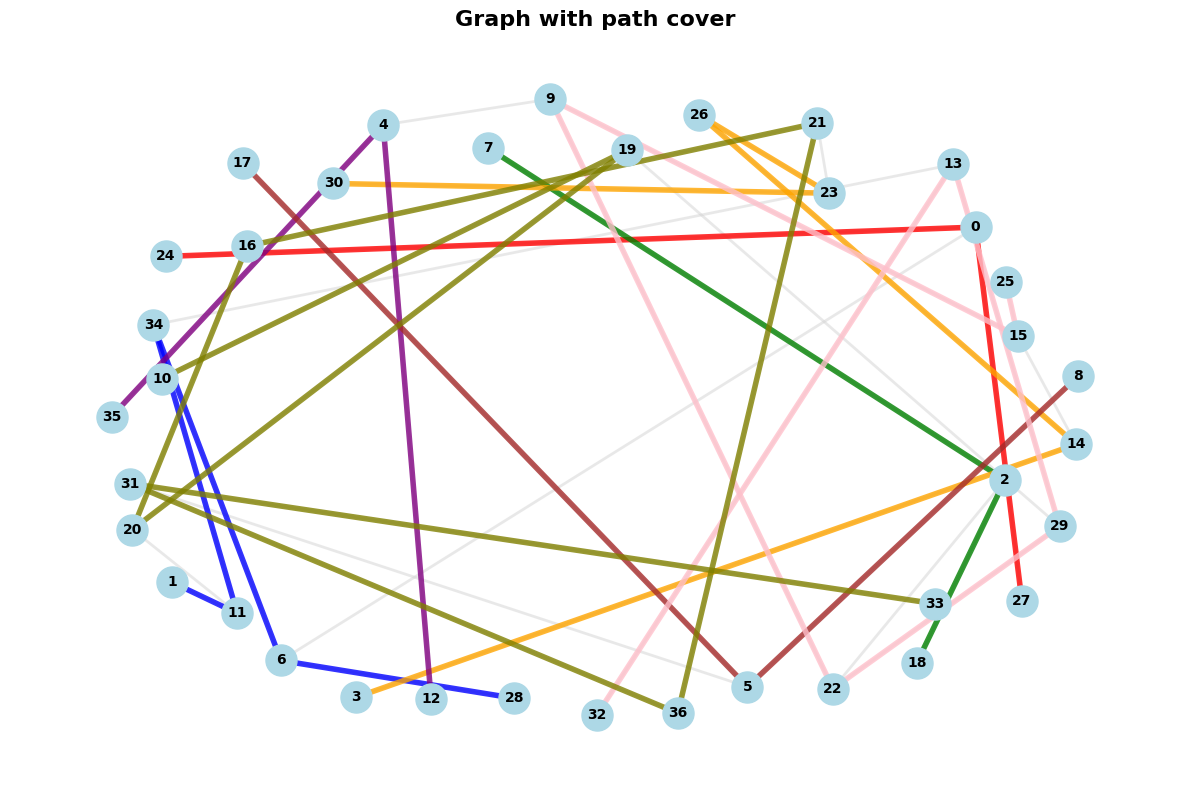

In [7]:
G, path_cover = demo(n_lines=8, n_more_edges=10)

In [8]:
circ = extract_circuit(G, path_cover)

In [9]:
render_circuit_jupyter(circ)

In [10]:
# view_browser(circ)